In [1]:
# Load libraries
import matplotlib.pyplot as plt
import pandas as pd
import pickle
import json
from pickle import dump, load
import numpy as np
import os
from keras.applications.resnet50 import ResNet50
from keras.optimizers import Adam
from keras.layers import Dense, Flatten,Input, Convolution2D, Dropout, LSTM, TimeDistributed, Embedding, Bidirectional, Activation, RepeatVector,Concatenate
from keras.models import Sequential, Model
from keras.utils import np_utils
import random
from keras.preprocessing import sequence
from keras.preprocessing.image import img_to_array, array_to_img, load_img
from keras.preprocessing import image
import matplotlib.pyplot as plt
from time import time
from cltk.tokenize.sentence import TokenizeSentence
import re

Using TensorFlow backend.


In [11]:
# Load data
images_dir = os.listdir("/home/kawser/Desktop/Machine learning projects/Deep Learning/bangla-natural-language-image-to-text-bnlit/bangla natural language image to text (bnlit)-preprocessing and resizing dataset-resized-500_375/")

images_path ='/home/kawser/Desktop/Machine learning projects/Deep Learning/bangla-natural-language-image-to-text-bnlit/bangla natural language image to text (bnlit)-preprocessing and resizing dataset-resized-500_375/image data/'
captions_path ="/home/kawser/Desktop/Machine learning projects/Deep Learning/bangla-natural-language-image-to-text-bnlit/data1.txt"

train_path ='/home/kawser/Desktop/Machine learning projects/Deep Learning/bangla-natural-language-image-to-text-bnlit/bangla natural language image to text (bnlit)-preprocessing and resizing dataset-resized-500_375/traind.txt'
#val_path = '../input/flickr_data/Flickr_Data/Flickr_TextData/Flickr_8k.devImages.txt'
test_path ='/home/kawser/Desktop/Machine learning projects/Deep Learning/bangla-natural-language-image-to-text-bnlit/bangla natural language image to text (bnlit)-preprocessing and resizing dataset-resized-500_375/test.txt'

captions = open(captions_path, 'r').read().split("\n")
x_train = open(train_path, 'r').read().split("\n")
#x_val = open(val_path, 'r').read().split("\n")
x_test = open(test_path, 'r').read().split("\n")

In [12]:
# Loading captions as values and images as key in dictionary
tokens = {}

for ix in range(len(captions)-1):
    temp = captions[ix].split("#")
    if temp[0] in tokens:
        tokens[temp[0]].append(temp[1][2:])
    else:
        tokens[temp[0]] = [temp[1][2:]]

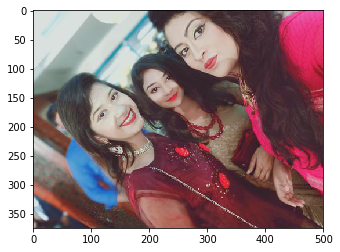

তিনজন মেয়ে দাড়িয়ে আছে
তিনজন মেয়ে দাড়িয়ে নিজেদের ছবি তুলছে
তিনজন মেয়ে হাসছে


In [13]:
# displaying an image and captions given to it
temp = captions[10].split("#")
from IPython.display import Image, display
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
imag = mpimg.imread(images_path+temp[0].strip())
plt.imshow(imag)
plt.show()

for ix in range(len(tokens[temp[0]])):
    print(tokens[temp[0]][ix])

In [16]:
# Creating train, test and validation dataset files with header as 'image_id' and 'captions'
train_dataset = open('flickr_8k_train_dataset1.txt','wb')
#train_dataset.write("image_id\tcaptions\n")

#val_dataset = open('flickr_8k_val_dataset.txt','wb')
#val_dataset.write(b"image_id\tcaptions\n")

test_dataset = open('flickr_8k_test_dataset1.txt','wb')
#test_dataset.write(b"image_id\tcaptions\n")


In [17]:
# Populating the above created files for train, test and validation dataset with image ids and captions for each of these images
for img in x_train:
    if img == '':
        continue
    for capt in tokens[img]:
        caption = "<start> "+ capt.strip() + " <end>"
        train_dataset.write((img+"\t"+caption+"\n").encode())
        train_dataset.flush()
train_dataset.close()

'''
for img in x_test:
    if img == '':
        continue
    for capt in tokens[img]:
        caption = "<start> "+ capt.strip() + " <end>"
        test_dataset.write((img+"\t"+caption+"\n").encode())
        test_dataset.flush()
test_dataset.close()
'''

In [18]:
# Loading 50 layer Residual Network Model and getting the summary of the model
from IPython.core.display import display, HTML
display(HTML("""<a href="http://ethereon.github.io/netscope/#/gist/db945b393d40bfa26006">ResNet50 Architecture</a>"""))
model = ResNet50(include_top=False,weights='imagenet',input_shape=(224,224,3),pooling='avg')
model.summary()
# Note: For more details on ResNet50 architecture you can click on hyperlink given below

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 224, 224, 3)  0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1 (Conv2D)                  (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
bn_conv1 (BatchNormalization)   (None, 112, 112, 64) 256         conv1[0][0]                      
__________________________________________________________________________________________________
activation

In [19]:
# Helper function to process images
def preprocessing(img_path):
    im = load_img(img_path, target_size=(224,224,3))
    im = img_to_array(im)
    im = np.expand_dims(im, axis=0)
    return im

In [20]:
train_data = {}
ctr=0
for ix in x_train:
    if ix == "":
        continue
    if ctr >= 3000:
        break
    ctr+=1
    if ctr%1000==0:
        print(ctr)
    ix=ix.strip()    
    path = images_path + ix
    img = preprocessing(path)
    pred = model.predict(img).reshape(2048)
    train_data[ix] = pred
    print(train_data[ix])

[0.7013176  0.9332095  0.4619068  ... 0.12914544 0.81968236 0.16050419]
[0.50901186 2.755916   0.01671429 ... 1.0090395  0.39091468 0.69924605]
[1.2022564  0.24368672 0.48037633 ... 0.2965446  0.30184093 0.14136495]
[2.3232057  1.8943924  0.         ... 1.032245   0.13703188 0.1488025 ]
[0.2726767  0.3963104  0.         ... 0.06941426 0.08104133 0.12907033]
[0.         0.5014717  0.         ... 0.46256408 0.13749646 0.        ]
[0.13808835 1.2496353  0.20222364 ... 5.86243    0.         0.        ]
[0.530649   6.563098   0.03950675 ... 0.97005785 0.45467278 0.2628918 ]
[1.602508   2.8805642  0.         ... 0.         0.06690378 0.00436056]
[0.13949105 1.5073005  0.14188676 ... 1.4034078  0.00360713 0.13907644]
[0.04014888 0.04405057 0.35725382 ... 0.1168648  0.03015658 0.        ]
[0.99040276 1.0227157  0.11167746 ... 1.1691725  1.2738296  0.41989687]
[0.22444263 0.02642334 0.12603167 ... 0.         0.         0.        ]
[0.13281691 2.2892962  0.25396723 ... 0.9372311  0.14577802 0.20

[0.03608017 1.2438416  0.         ... 2.0286965  0.04261867 0.36554053]
[0.21353112 3.064025   0.05598914 ... 1.4347829  0.06138017 0.86477405]
[0.68725985 4.6243587  0.03977046 ... 1.5677478  0.38917208 0.03302713]
[0.9959785  2.9682384  0.04339298 ... 0.         0.33031732 0.11383876]
[0.62416416 3.6265337  0.         ... 0.42587677 1.4930773  0.        ]
[0.33215794 3.9709277  0.17679842 ... 0.16599376 0.23126766 0.32615814]
[0.05197408 0.25857547 0.05425543 ... 0.45238087 0.00192239 0.0787096 ]
[0.6256886  0.20368743 0.7642634  ... 0.03066661 0.04243236 0.        ]
[0.26513088 2.4278207  0.         ... 1.5013498  0.73916376 0.351405  ]
[0.5138347  0.26194456 0.13820732 ... 0.01577347 0.         0.        ]
[0.25297695 0.43645185 0.10349847 ... 0.03639728 0.01789124 0.1731457 ]
[0.4946922  0.60197276 0.00649882 ... 0.21222275 0.12250262 0.05548072]
[0.27907583 1.6982011  0.03204786 ... 1.0705462  0.         0.65997994]
[0.02666623 1.8703506  0.05799303 ... 1.6126735  0.00663104 0.56

[0.08181058 2.7693815  0.0777956  ... 0.524      0.1296078  0.21513444]
[0.00539678 0.13983807 0.67383367 ... 0.3490374  0.66080236 0.74751455]
[0.91746134 2.4012146  0.665358   ... 0.03630304 0.09712056 0.13444605]
[0.07399868 1.1496444  0.2196768  ... 2.3137653  0.25027016 0.13763036]
[0.14336193 0.91736573 0.25370917 ... 0.03935559 1.5105531  0.06303024]
[0.9254592  3.2759418  0.22337073 ... 1.3481811  0.2711651  0.4149315 ]
[0.3185759  2.3069663  0.         ... 0.39161336 0.3338118  0.11698163]
[0.60347784 2.345781   0.03559158 ... 0.39354664 0.09388257 0.4309129 ]
[2.2683427  1.6079876  0.         ... 0.         0.08210012 0.00292208]
[0.86072546 1.4232764  0.47716653 ... 1.6047678  0.79847664 0.00736238]
[0.39213923 0.8369225  0.         ... 0.08357346 0.19492757 0.0389154 ]
[1.2140014  3.868992   0.02686165 ... 0.02269251 0.697124   0.00525128]
[0.12495331 2.7917752  0.2503552  ... 3.2696438  0.22789066 1.4699713 ]
[2.3477285  0.858904   0.21657436 ... 1.0645515  1.6831136  0.11

In [21]:
train_data['Ji_1000.jpg'].shape

(2048,)

In [22]:
train_data

{'Ji_1000.jpg': array([1.0260324 , 0.15026243, 0.        , ..., 0.04866079, 0.6903997 ,
        0.09601323], dtype=float32),
 'Ji_1001.JPG': array([0.05027844, 2.4189992 , 0.08626976, ..., 0.2720579 , 0.24299632,
        0.39252245], dtype=float32),
 'Ji_1002.JPG': array([0.06298236, 2.235057  , 0.04133582, ..., 0.03856815, 0.08068155,
        0.2190073 ], dtype=float32),
 'Ji_1003.jpg': array([8.4058690e-01, 2.1709540e+00, 2.0619095e-03, ..., 8.5035950e-02,
        8.8294494e-01, 3.5072148e-01], dtype=float32),
 'Ji_1004.jpg': array([0.4877729 , 0.4223411 , 0.1727569 , ..., 0.01286316, 0.42277223,
        0.39454737], dtype=float32),
 'Ji_1005.jpg': array([0.3185759 , 2.3069663 , 0.        , ..., 0.39161336, 0.3338118 ,
        0.11698163], dtype=float32),
 'Ji_1006.jpg': array([0.57336134, 0.34010857, 0.0836935 , ..., 0.52395135, 0.12803102,
        0.44869083], dtype=float32),
 'Ji_1007.jpg': array([0.22345348, 0.9430742 , 0.        , ..., 0.01735104, 0.6606315 ,
        0.03226337]

In [23]:
# opening train_encoded_images.p file and dumping it's content
with open( "train_encoded_images.p", "wb" ) as pickle_f:
    pickle.dump(train_data, pickle_f) 


In [24]:
# Loading image and its corresponding caption into a dataframe and then storing values from dataframe into 'ds'
pd_dataset = pd.read_csv("flickr_8k_train_dataset1.txt", delimiter= '\t')
ds = pd_dataset.values
print(ds.shape)

(897, 2)


In [25]:
pd_dataset

,image_id,captions
0,Ji_1367.JPG,<start> দুইটি মেয়ে ছবি তোলার প্রস্তুতি নিচ্ছে ...
1,Ji_1367.JPG,<start> দুইটি মেয়ে ছবি তুলছে <end>
2,Ji_1367.JPG,<start> দুইটি মেয়ে বসে ছবি <end>
3,ji_ts_tf_1217.JPG,<start> কিছু ছেলে আনন্দ করছে <end>
4,ji_ts_tf_1217.JPG,<start> কিছু ছেলে দাড়িয়ে আনন্দ করছে <end>
5,ji_ts_tf_1217.JPG,<start> কিছু ছেলে নাচছে <end>
6,Ji_1065.jpg,<start> একটি পাখি বসে আছে <end>
7,Ji_1065.jpg,<start> লাল রঙের একটি পাখি বসে আছে <end>
8,Ji_1065.jpg,<start> গাছের ঢালে একটি পাখি বসে আছে <end>
9,ji_ts_tf_1065.JPG,"<start> পাঞ্জাবি ও পাগ্রি পরনে জামাই, আশে পাশে..."


In [26]:
# Storing all the captions from ds into a list
sentences = []
for ix in range(ds.shape[0]):
    sentences.append(ds[ix, 1])
    
print(len(sentences))

897


In [27]:
# First 5 captions stored in sentences
sentences[:5]

['<start> দুইটি মেয়ে ছবি তোলার প্রস্তুতি নিচ্ছে <end>',
 '<start> দুইটি মেয়ে ছবি তুলছে <end>',
 '<start> দুইটি মেয়ে বসে ছবি <end>',
 '<start> কিছু ছেলে আনন্দ করছে <end>',
 '<start> কিছু ছেলে দাড়িয়ে আনন্দ করছে <end>']

In [28]:
# Storing all the captions from ds into a list
sentences = []
for ix in range(ds.shape[0]):
    sentences.append(ds[ix, 1])
    
print(len(sentences))

897


In [29]:
# Splitting each captions stored in 'sentences' and storing them in 'words' as list of list
#tokenizer = TokenizeSentence('bengali')
#bengali=[tokenizer.tokenize(sentences[0])]
#bengali_text_tokenize = [tokenizer.tokenize(str(i)) for i in sentences]
#bengali
words = [re.split(" ",str(sentences[i])) for i in range(897)]
print(type(sentences[0]))
print(sentences[0])
words

<class 'str'>
<start> দুইটি মেয়ে ছবি তোলার প্রস্তুতি নিচ্ছে <end>


[['<start>', 'দুইটি', 'মেয়ে', 'ছবি', 'তোলার', 'প্রস্তুতি', 'নিচ্ছে', '<end>'],
 ['<start>', 'দুইটি', 'মেয়ে', 'ছবি', 'তুলছে', '<end>'],
 ['<start>', 'দুইটি', 'মেয়ে', 'বসে', 'ছবি', '<end>'],
 ['<start>', 'কিছু', 'ছেলে', 'আনন্দ', 'করছে', '<end>'],
 ['<start>', 'কিছু', 'ছেলে', 'দাড়িয়ে', 'আনন্দ', 'করছে', '<end>'],
 ['<start>', 'কিছু', 'ছেলে', 'নাচছে', '<end>'],
 ['<start>', 'একটি', 'পাখি', 'বসে', 'আছে', '<end>'],
 ['<start>', 'লাল', 'রঙের', 'একটি', 'পাখি', 'বসে', 'আছে', '<end>'],
 ['<start>', 'গাছের', 'ঢালে', 'একটি', 'পাখি', 'বসে', 'আছে', '<end>'],
 ['<start>',
  'পাঞ্জাবি',
  'ও',
  'পাগ্রি',
  'পরনে',
  'জামাই,',
  'আশে',
  'পাশে',
  'ঘিরে',
  'আছে',
  'অনেক',
  'মানুষ',
  '<end>'],
 ['<start>',
  'অনেক',
  'মানুষ',
  'পাঞ্জাবি',
  'ও',
  'পাগ্রি',
  'পরনে',
  'জামাইকে',
  'ঘিরে',
  'আছে',
  '<end>'],
 ['<start>',
  'পাঞ্জাবি',
  'পড়া',
  'জামাইকে',
  'ঘিরে',
  'আছে',
  'অনেক',
  'মানুষ',
  '<end>'],
 ['<start>', 'একটি', 'মসজিদ', 'দেখা', 'যায়', '<end>'],
 ['<start>', 'মসজিদ', 'এর', 'সামনে

In [30]:
print(type(sentences))

<class 'list'>


In [31]:
# Creating a list of all unique words
unique = []
for i in words:
    unique.extend(i)
unique = list(set(unique))

print(len(unique))

vocab_size = len(unique)

427


In [32]:
# Vectorization
word_2_indices = {val:index for index, val in enumerate(unique)}
indices_2_word = {index:val for index, val in enumerate(unique)}

In [33]:
word_2_indices['UNK'] = 0
word_2_indices['raining'] = 427

In [34]:


indices_2_word[0] = 'UNK'
indices_2_word[427] = 'raining'



In [35]:
print(word_2_indices['<start>'])
print(indices_2_word[100])
print(word_2_indices['<end>'])
print(indices_2_word[425])

341
দুটি
392
পাগ্রি


In [36]:
vocab_size = len(word_2_indices.keys())
print(vocab_size)

429


In [37]:
max_len = 0

for i in sentences:
    i = str(i).split()
    if len(i) > max_len:
        max_len = len(i)

print(max_len)

25


In [38]:
padded_sequences, subsequent_words = [], []

for ix in range(299):
    partial_seqs = []
    next_words = []
    text = str(ds[ix, 1]).split()
    text = [word_2_indices[i] for i in text]
    for i in range(1, len(text)):
        partial_seqs.append(text[:i])
        next_words.append(text[i])
    padded_partial_seqs = sequence.pad_sequences(partial_seqs, max_len, padding='post')

    next_words_1hot = np.zeros([len(next_words), vocab_size], dtype=np.bool)
    
    #Vectorization
    for i,next_word in enumerate(next_words):
        next_words_1hot[i, next_word] = 1
        
    padded_sequences.append(padded_partial_seqs)
    subsequent_words.append(next_words_1hot)
    
padded_sequences = np.asarray(padded_sequences)
subsequent_words = np.asarray(subsequent_words)

print(padded_sequences.shape)
print(subsequent_words.shape)

(299,)
(299,)


In [39]:
print(len(padded_sequences[0]))

7


In [40]:
for ix in range(len(padded_sequences[0])):
    for iy in range(max_len):
        print(indices_2_word[padded_sequences[0][ix][iy]],)
    print("\n")

print(len(padded_sequences[0]))

<start>
UNK
UNK
UNK
UNK
UNK
UNK
UNK
UNK
UNK
UNK
UNK
UNK
UNK
UNK
UNK
UNK
UNK
UNK
UNK
UNK
UNK
UNK
UNK
UNK


<start>
দুইটি
UNK
UNK
UNK
UNK
UNK
UNK
UNK
UNK
UNK
UNK
UNK
UNK
UNK
UNK
UNK
UNK
UNK
UNK
UNK
UNK
UNK
UNK
UNK


<start>
দুইটি
মেয়ে
UNK
UNK
UNK
UNK
UNK
UNK
UNK
UNK
UNK
UNK
UNK
UNK
UNK
UNK
UNK
UNK
UNK
UNK
UNK
UNK
UNK
UNK


<start>
দুইটি
মেয়ে
ছবি
UNK
UNK
UNK
UNK
UNK
UNK
UNK
UNK
UNK
UNK
UNK
UNK
UNK
UNK
UNK
UNK
UNK
UNK
UNK
UNK
UNK


<start>
দুইটি
মেয়ে
ছবি
তোলার
UNK
UNK
UNK
UNK
UNK
UNK
UNK
UNK
UNK
UNK
UNK
UNK
UNK
UNK
UNK
UNK
UNK
UNK
UNK
UNK


<start>
দুইটি
মেয়ে
ছবি
তোলার
প্রস্তুতি
UNK
UNK
UNK
UNK
UNK
UNK
UNK
UNK
UNK
UNK
UNK
UNK
UNK
UNK
UNK
UNK
UNK
UNK
UNK


<start>
দুইটি
মেয়ে
ছবি
তোলার
প্রস্তুতি
নিচ্ছে
UNK
UNK
UNK
UNK
UNK
UNK
UNK
UNK
UNK
UNK
UNK
UNK
UNK
UNK
UNK
UNK
UNK
UNK


7


In [41]:
num_of_images = 299

In [42]:
captions = np.zeros([0, max_len])
next_words = np.zeros([0, vocab_size])

In [43]:
for ix in range(num_of_images):#img_to_padded_seqs.shape[0]):
    captions = np.concatenate([captions, padded_sequences[ix]])
    next_words = np.concatenate([next_words, subsequent_words[ix]])

np.save("captions.npy", captions)
np.save("next_words.npy", next_words)

print(captions.shape)
print(next_words.shape)

(2348, 25)
(2348, 429)


In [44]:
with open('/home/kawser/Desktop/Machine learning projects/Deep Learning/bangla-natural-language-image-to-text-bnlit/train_encoded_images.p', 'rb') as f:
    encoded_images = pickle.load(f, encoding="bytes")
encoded_images['Ji_1000.jpg']
#ds.shape[0]
ds[1,0]
#bytes(ds[1,0].encode())
#encoded_images.keys()
#print(ds[1, 0].encode())

'Ji_1367.JPG'

In [45]:
imgs = []

for ix in range(ds.shape[0]):
    #print(ix,ds[ix, 0].encode())
    if ds[ix, 0] in encoded_images.keys():
        print(ix, encoded_images[ds[ix, 0]])
        imgs.append(list(encoded_images[ds[ix, 0]]))

imgs = np.asarray(imgs)
#print(imgs.shape)
print(imgs)

0 [0.7013176  0.9332095  0.4619068  ... 0.12914544 0.81968236 0.16050419]
1 [0.7013176  0.9332095  0.4619068  ... 0.12914544 0.81968236 0.16050419]
2 [0.7013176  0.9332095  0.4619068  ... 0.12914544 0.81968236 0.16050419]
3 [0.50901186 2.755916   0.01671429 ... 1.0090395  0.39091468 0.69924605]
4 [0.50901186 2.755916   0.01671429 ... 1.0090395  0.39091468 0.69924605]
5 [0.50901186 2.755916   0.01671429 ... 1.0090395  0.39091468 0.69924605]
6 [1.2022564  0.24368672 0.48037633 ... 0.2965446  0.30184093 0.14136495]
7 [1.2022564  0.24368672 0.48037633 ... 0.2965446  0.30184093 0.14136495]
8 [1.2022564  0.24368672 0.48037633 ... 0.2965446  0.30184093 0.14136495]
9 [2.3232057  1.8943924  0.         ... 1.032245   0.13703188 0.1488025 ]
10 [2.3232057  1.8943924  0.         ... 1.032245   0.13703188 0.1488025 ]
11 [2.3232057  1.8943924  0.         ... 1.032245   0.13703188 0.1488025 ]
12 [0.2726767  0.3963104  0.         ... 0.06941426 0.08104133 0.12907033]
13 [0.2726767  0.3963104  0.       

229 [1.2943363  1.3202088  0.71115476 ... 0.         0.03021144 0.3440871 ]
230 [1.2943363  1.3202088  0.71115476 ... 0.         0.03021144 0.3440871 ]
231 [1.1610538  1.4143269  0.15834035 ... 1.1343215  0.34284565 0.10768417]
232 [1.1610538  1.4143269  0.15834035 ... 1.1343215  0.34284565 0.10768417]
233 [1.1610538  1.4143269  0.15834035 ... 1.1343215  0.34284565 0.10768417]
234 [2.422744   1.7704769  0.         ... 0.         0.40968424 0.        ]
235 [2.422744   1.7704769  0.         ... 0.         0.40968424 0.        ]
236 [2.422744   1.7704769  0.         ... 0.         0.40968424 0.        ]
237 [0.74431133 1.6900843  0.72652537 ... 0.         0.41038334 0.17618716]
238 [0.74431133 1.6900843  0.72652537 ... 0.         0.41038334 0.17618716]
239 [0.74431133 1.6900843  0.72652537 ... 0.         0.41038334 0.17618716]
240 [0.2849849  2.7474897  0.02724405 ... 0.8844475  0.04749168 0.05846437]
241 [0.2849849  2.7474897  0.02724405 ... 0.8844475  0.04749168 0.05846437]
242 [0.28498

614 [0.05486681 0.128136   0.         ... 0.         0.03206164 0.3011674 ]
615 [1.6370869  1.2198523  0.47481918 ... 2.8807132  0.5138375  0.        ]
616 [1.6370869  1.2198523  0.47481918 ... 2.8807132  0.5138375  0.        ]
617 [1.6370869  1.2198523  0.47481918 ... 2.8807132  0.5138375  0.        ]
618 [0.43639284 1.8040594  0.         ... 0.         1.1725832  0.        ]
619 [0.43639284 1.8040594  0.         ... 0.         1.1725832  0.        ]
620 [0.43639284 1.8040594  0.         ... 0.         1.1725832  0.        ]
621 [0.6973053  0.79208726 0.04234742 ... 7.2525487  0.1071293  0.99346703]
622 [0.6973053  0.79208726 0.04234742 ... 7.2525487  0.1071293  0.99346703]
623 [0.6973053  0.79208726 0.04234742 ... 7.2525487  0.1071293  0.99346703]
624 [1.6861587  1.210498   0.10296352 ... 0.02545134 0.19819616 0.25707415]
625 [1.6861587  1.210498   0.10296352 ... 0.02545134 0.19819616 0.25707415]
626 [1.6861587  1.210498   0.10296352 ... 0.02545134 0.19819616 0.25707415]
627 [0.73279

In [46]:


images = []
print(num_of_images)
for ix in range(299):
    #print(padded_sequences[1784-1].shape[0])
    for iy in range(padded_sequences[ix].shape[0]):
        images.append(imgs[ix])
        
images = np.asarray(images)

np.save("images.npy", images)

print(images.shape)



299
(2348, 2048)


In [47]:
image_names = []

for ix in range(num_of_images):
    for iy in range(padded_sequences[ix].shape[0]):
        image_names.append(ds[ix, 0])
        
image_names = np.asarray(image_names)

np.save("image_names.npy", image_names)

print(len(image_names))

2348


In [48]:
captions = np.load("captions.npy")
next_words = np.load("next_words.npy")

print(captions.shape)
print(next_words.shape)

(2348, 25)
(2348, 429)


In [49]:
images = np.load("images.npy")

print(images.shape)

(2348, 2048)


In [50]:
imag = np.load("image_names.npy")
        
print(imag.shape)

(2348,)


In [51]:
embedding_size = 128
max_len = 25

In [52]:
image_model = Sequential()

image_model.add(Dense(embedding_size, input_shape=(2048,), activation='relu'))
image_model.add(RepeatVector(max_len))

image_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 128)               262272    
_________________________________________________________________
repeat_vector_1 (RepeatVecto (None, 25, 128)           0         
Total params: 262,272
Trainable params: 262,272
Non-trainable params: 0
_________________________________________________________________


In [53]:
language_model = Sequential()

language_model.add(Embedding(input_dim=vocab_size, output_dim=embedding_size, input_length=max_len))
language_model.add(LSTM(256, return_sequences=True))
language_model.add(TimeDistributed(Dense(embedding_size)))

language_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 25, 128)           54912     
_________________________________________________________________
lstm_1 (LSTM)                (None, 25, 256)           394240    
_________________________________________________________________
time_distributed_1 (TimeDist (None, 25, 128)           32896     
Total params: 482,048
Trainable params: 482,048
Non-trainable params: 0
_________________________________________________________________


In [56]:
conca = Concatenate()([image_model.output, language_model.output])
x = LSTM(128, return_sequences=True)(conca)
x = LSTM(512, return_sequences=False)(x)
x = Dense(vocab_size)(x)
out = Activation('softmax')(x)
model = Model(inputs=[image_model.input, language_model.input], outputs = out)

# model.load_weights("../input/model_weights.h5")
model.compile(loss='categorical_crossentropy', optimizer='RMSprop', metrics=['accuracy'])
model.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
embedding_1_input (InputLayer)  (None, 25)           0                                            
__________________________________________________________________________________________________
dense_1_input (InputLayer)      (None, 2048)         0                                            
__________________________________________________________________________________________________
embedding_1 (Embedding)         (None, 25, 128)      54912       embedding_1_input[0][0]          
__________________________________________________________________________________________________
dense_1 (Dense)                 (None, 128)          262272      dense_1_input[0][0]              
__________________________________________________________________________________________________
lstm_1 (LS

In [82]:
hist = model.fit([images, captions], next_words, batch_size=512, epochs=200)

Epoch 1/200
2348/2348 [==============================] - 14s 6ms/step - loss: 0.3197 - acc: 0.8420
Epoch 2/200
2348/2348 [==============================] - 15s 6ms/step - loss: 0.3415 - acc: 0.8245
Epoch 3/200
2348/2348 [==============================] - 13s 6ms/step - loss: 0.7624 - acc: 0.6951
Epoch 4/200
2348/2348 [==============================] - 13s 6ms/step - loss: 0.6612 - acc: 0.7232
Epoch 5/200
2348/2348 [==============================] - 13s 6ms/step - loss: 0.3472 - acc: 0.8330
Epoch 6/200
2348/2348 [==============================] - 13s 6ms/step - loss: 0.3173 - acc: 0.8403
Epoch 7/200
2348/2348 [==============================] - 13s 6ms/step - loss: 0.3436 - acc: 0.8220
Epoch 8/200
2348/2348 [==============================] - 13s 6ms/step - loss: 0.3196 - acc: 0.8382
Epoch 9/200
2348/2348 [==============================] - 13s 6ms/step - loss: 0.3227 - acc: 0.8339
Epoch 10/200
2348/2348 [==============================] - 13s 6ms/step - loss: 0.7309 - acc: 0.7006
Epoch 11/

2348/2348 [==============================] - 14s 6ms/step - loss: 0.2452 - acc: 0.8663
Epoch 84/200
2348/2348 [==============================] - 14s 6ms/step - loss: 0.3122 - acc: 0.8433
Epoch 85/200
2348/2348 [==============================] - 14s 6ms/step - loss: 0.6584 - acc: 0.7240
Epoch 86/200
2348/2348 [==============================] - 14s 6ms/step - loss: 0.3277 - acc: 0.8437
Epoch 87/200
2348/2348 [==============================] - 16s 7ms/step - loss: 0.2530 - acc: 0.8680
Epoch 88/200
2348/2348 [==============================] - 14s 6ms/step - loss: 0.2455 - acc: 0.8697
Epoch 89/200
2348/2348 [==============================] - 15s 6ms/step - loss: 0.2369 - acc: 0.8680
Epoch 90/200
2348/2348 [==============================] - 15s 6ms/step - loss: 0.2565 - acc: 0.8565
Epoch 91/200
2348/2348 [==============================] - 16s 7ms/step - loss: 0.4699 - acc: 0.7913
Epoch 92/200
2348/2348 [==============================] - 15s 7ms/step - loss: 0.4884 - acc: 0.7913
Epoch 93/200


2348/2348 [==============================] - 13s 6ms/step - loss: 0.2080 - acc: 0.8739
Epoch 165/200
2348/2348 [==============================] - 13s 6ms/step - loss: 0.2451 - acc: 0.8654
Epoch 166/200
2348/2348 [==============================] - 13s 6ms/step - loss: 0.3862 - acc: 0.8198
Epoch 167/200
2348/2348 [==============================] - 13s 6ms/step - loss: 0.3998 - acc: 0.8284
Epoch 168/200
2348/2348 [==============================] - 13s 6ms/step - loss: 0.2208 - acc: 0.8790
Epoch 169/200
2348/2348 [==============================] - 13s 6ms/step - loss: 0.2039 - acc: 0.8769
Epoch 170/200
2348/2348 [==============================] - 13s 6ms/step - loss: 0.1979 - acc: 0.8850
Epoch 171/200
2348/2348 [==============================] - 13s 6ms/step - loss: 0.1975 - acc: 0.8829
Epoch 172/200
2348/2348 [==============================] - 13s 6ms/step - loss: 0.2004 - acc: 0.8795
Epoch 173/200
2348/2348 [==============================] - 13s 6ms/step - loss: 0.2364 - acc: 0.8697
Epoc

In [83]:
model.save_weights("model_weights_mini.h5")

In [84]:
def preprocessing(img_path):
    im = image.load_img(img_path, target_size=(224,224,3))
    im = image.img_to_array(im)
    im = np.expand_dims(im, axis=0)
    return im

In [85]:
def get_encoding(model, img):
    image = preprocessing(img)
    pred = model.predict(image).reshape(2048)
    return pred

In [86]:
resnet = ResNet50(include_top=False,weights='imagenet',input_shape=(224,224,3),pooling='avg')

In [273]:
#img = "../input/flickr_data/Flickr_Data/Images/1453366750_6e8cf601bf.jpg"
img ='/home/kawser/Desktop/Machine learning projects/Deep Learning/bangla-natural-language-image-to-text-bnlit/bangla natural language image to text (bnlit)-preprocessing and resizing dataset-resized-500_375/NEW/70.png'


test_img = get_encoding(resnet, img)

In [274]:
def predict_captions(image):
    start_word = ["<start>"]
    while True:
        par_caps = [word_2_indices[i] for i in start_word]
        par_caps = sequence.pad_sequences([par_caps], maxlen=max_len, padding='post')
        preds = model.predict([np.array([image]), np.array(par_caps)])
        word_pred = indices_2_word[np.argmax(preds[0])]
        start_word.append(word_pred)
        
        if word_pred == "<end>" or len(start_word) > max_len:
            break
            
    return ' '.join(start_word[1:-1])

Argmax_Search = predict_captions(test_img)

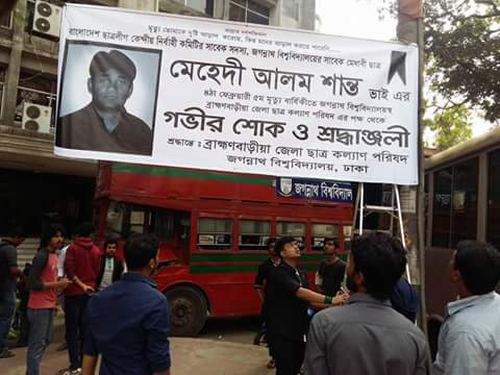

কিছু মানুষ ও দাড়িয়ে আছে


In [275]:
z = Image(filename=img)
display(z)

print(Argmax_Search)